In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
data = pd.read_csv("eval_results.csv")
# calculate the compression rate
data["compression_rate"] = 2600 / data["filesize"]
main_tasks_df = data[data['task']==data['finetuned_on']]
other_tasks_df = data[data['task']!=data['finetuned_on']]

In [46]:
"""
First figures:
- On main task: x-axis is the compression rate, y-axis is the accuracy, different color representing different tasks, different shape representing different methods
"""
main_tasks_df = main_tasks_df.sort_values(by=['task', 'method', 'wbit', 'sparsity', 'group_size'])
main_tasks_df.to_csv("main_tasks.csv", index=False)
other_tasks_df = other_tasks_df.sort_values(by=['task', 'method', 'wbit', 'sparsity', 'group_size'])
other_tasks_df.to_csv("other_tasks.csv", index=False)

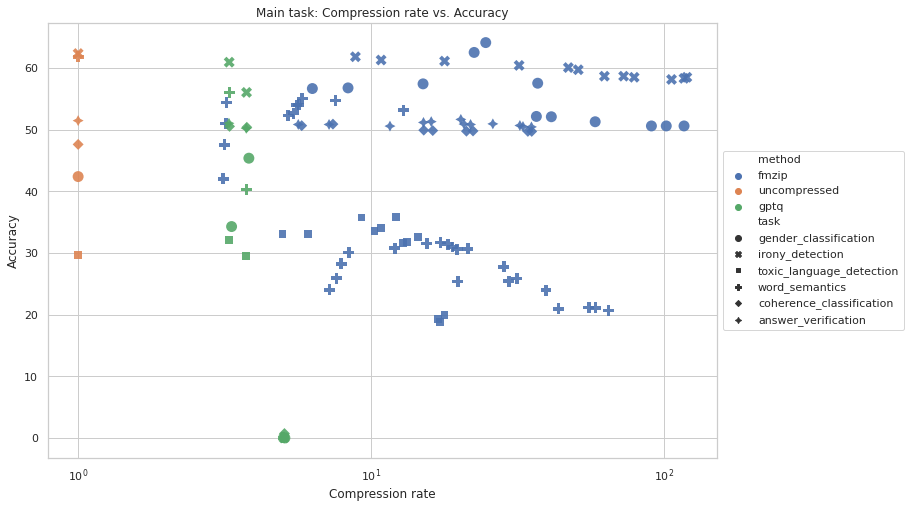

In [14]:
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(12, 8))
# compressed_df = data[data["method"].isin(["gptq", "fmzip"])]
compressed_df = data
g = sns.scatterplot(x="compression_rate", y="em_acc",
                style="task", hue="method",
                linewidth=0, alpha=.9, s=120,
                data=main_tasks_df, ax=ax)
g.set_xlabel("Compression rate")
g.set_ylabel("Accuracy")
g.set_title("Main task: Compression rate vs. Accuracy")
plt.xscale('log')

g.legend(loc='center left', bbox_to_anchor=(1, 0.5))

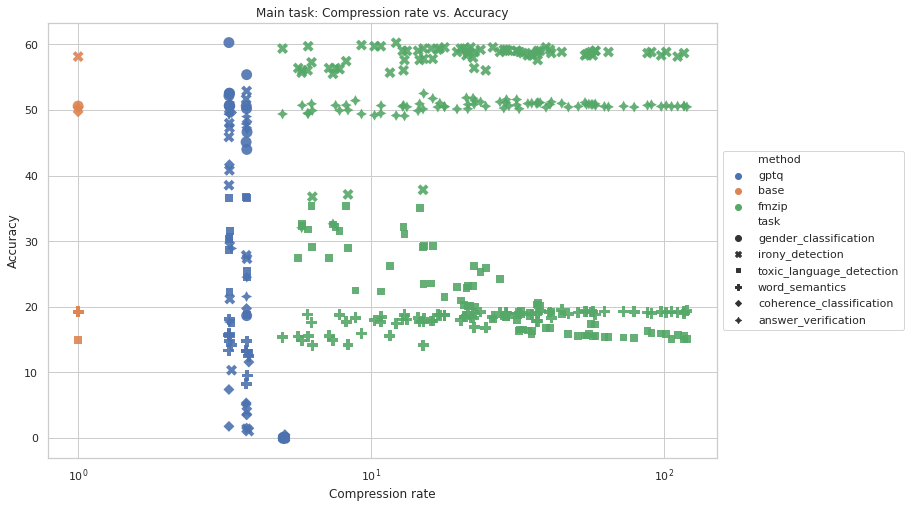

In [15]:
"""
Second figures:
- On secondary tasks: x-axis is the compression rate, y-axis is the accuracy, different color representing different tasks, different shape representing different methods
"""
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(12, 8))
# compressed_df = data[data["method"].isin(["gptq", "fmzip"])]
compressed_df = data
g = sns.scatterplot(x="compression_rate", y="em_acc",
                style="task", hue="method",
                linewidth=0, alpha=.9, s=120,
                data=other_tasks_df, ax=ax)
g.set_xlabel("Compression rate")
g.set_ylabel("Accuracy")
g.set_title("Main task: Compression rate vs. Accuracy")
plt.xscale('log')

g.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [45]:
## Playground
focused_task = 'word_semantics'
# line plot, x-compression rate, y-accuracy, y-ci-bar
focused_task_df = main_tasks_df[main_tasks_df['task']==focused_task]
focused_task_df = focused_task_df.sort_values(by=['wbit', 'sparsity', 'group_size'])
# only keep accuracy, wbit, sparsity, group_size
focused_task_df = focused_task_df[['method','wbit', 'sparsity', 'group_size', 'em_acc', 'filesize']]
focused_task_df.to_csv(f"{focused_task}_eval_results.csv", index=False)

# sns.set_theme(style="whitegrid")
# f, ax = plt.subplots(figsize=(12, 8))
# g = sns.scatterplot(x="compression_rate", y="em_acc",
#                 style="task", hue="method",
#                 linewidth=0, alpha=.9, s=120,
#                 data=focused_task_df, ax=ax)
# g.set_xlabel("Compression rate")
# g.set_ylabel("Accuracy")
# g.set_title("Main task: Compression rate vs. Accuracy")
# plt.xscale('log')

# g.legend(loc='center left', bbox_to_anchor=(1, 0.5))